Heat Equation Solver: Comparing Forward Euler, Backward Euler, and Crank Nicholson Methods

Consider the boundary value problem of the heat equation

ut(t, x) − uxx(t, x) = 0,

u(0, x) = e^−100x^2,

u(−1, t) = u(1, t) = 0

Take the time step k = 0.1 and mesh size
h = 0.02, and plot u(1, x).


Below is the Forward Euler Method in Time and Central Difference in Space

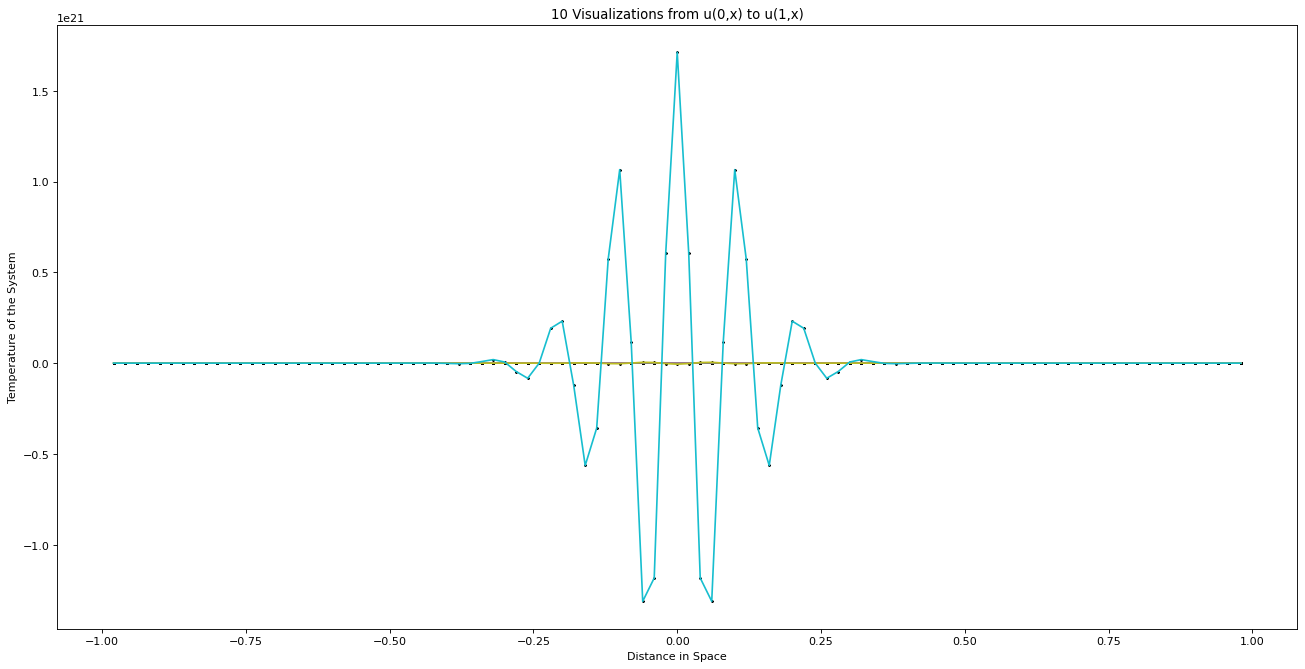

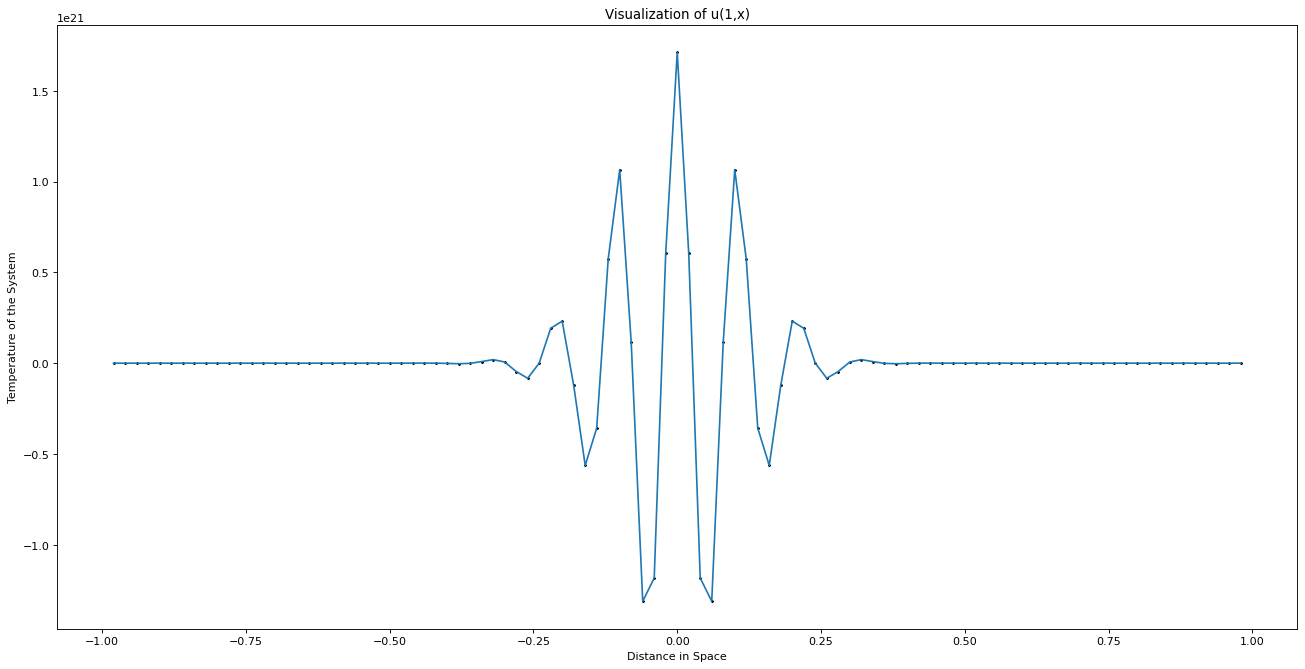

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
from scipy.linalg import solve

h = 0.02
n = 100
k = 0.1
r = k/(h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA2():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A[i,i]= (1-2*r)
        A[i,i+1]= r
        A[i+1,i]= r
    return (A)

def test2():
    X = Createb()
    t = np.arange(-1+h,1,h)
    for i in range (0,10):
        uj1 = np.matmul(CreateA2(),X)
        X = uj1
        plt.plot(t,uj1)
        plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        plt.title("10 Visualizations from u(0,x) to u(1,x)")
        plt.xlabel('Distance in Space')
        plt.ylabel('Temperature of the System')
    plt.show()
    return (uj1)
uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Backward Euler in Time and Central Difference in Space

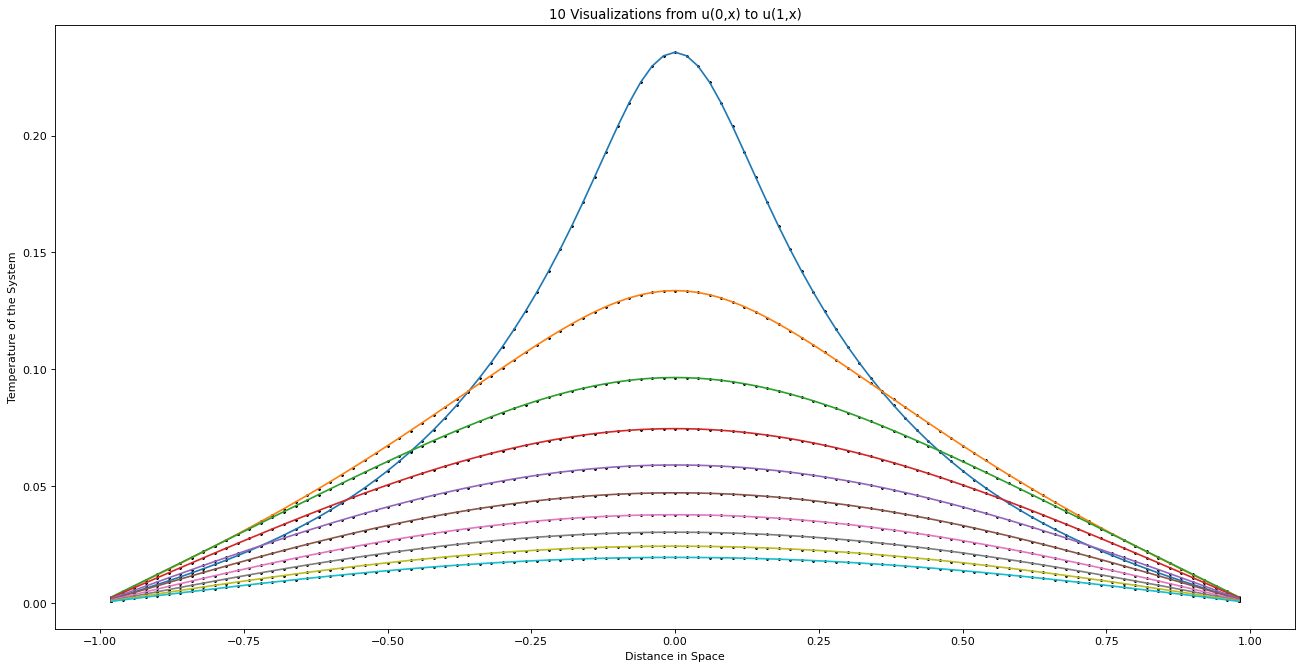

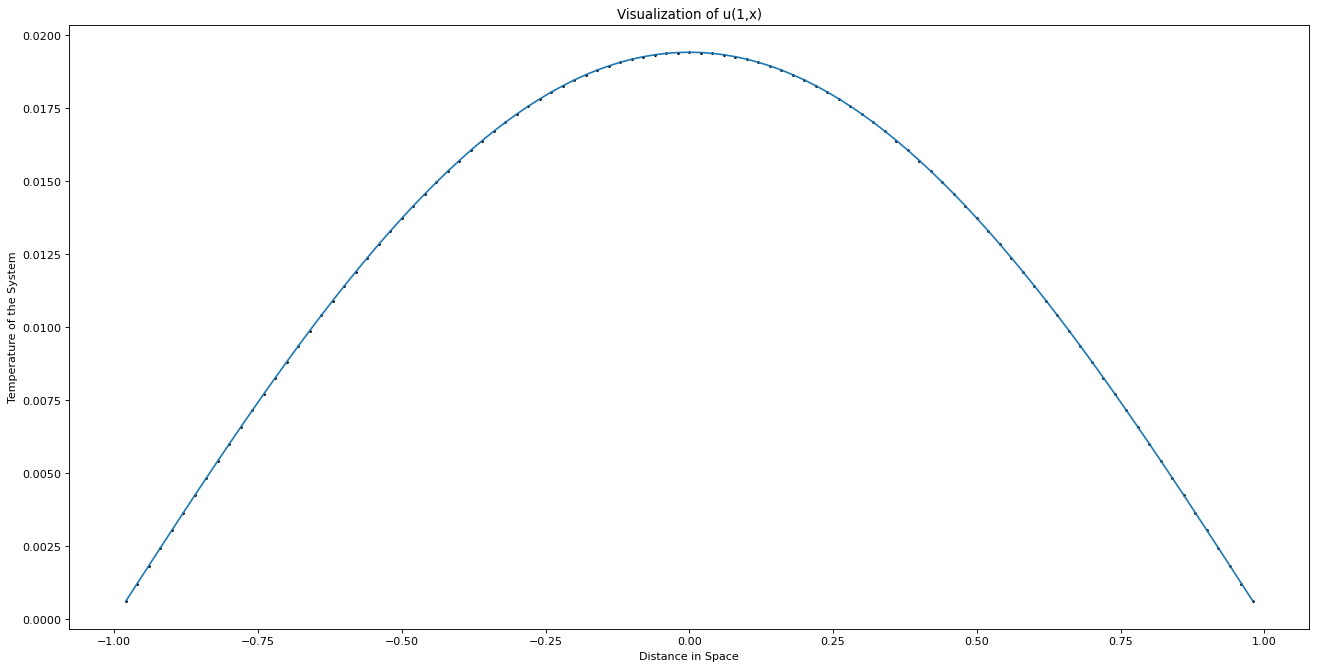

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
from scipy.linalg import solve

h = 0.02
n = 100
k = 0.1
r = k/(h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)

def test2():
    X = Createb()
    t = np.arange(-1+h,1,h)
    for i in range (0,10):
        uj1 = solve(CreateA(),X)
        X = uj1
        plt.plot(t,uj1)
        plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        plt.title("10 Visualizations from u(0,x) to u(1,x)")
        plt.xlabel('Distance in Space')
        plt.ylabel('Temperature of the System')
    plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Crank Nicolson in Time and Central Difference in Space

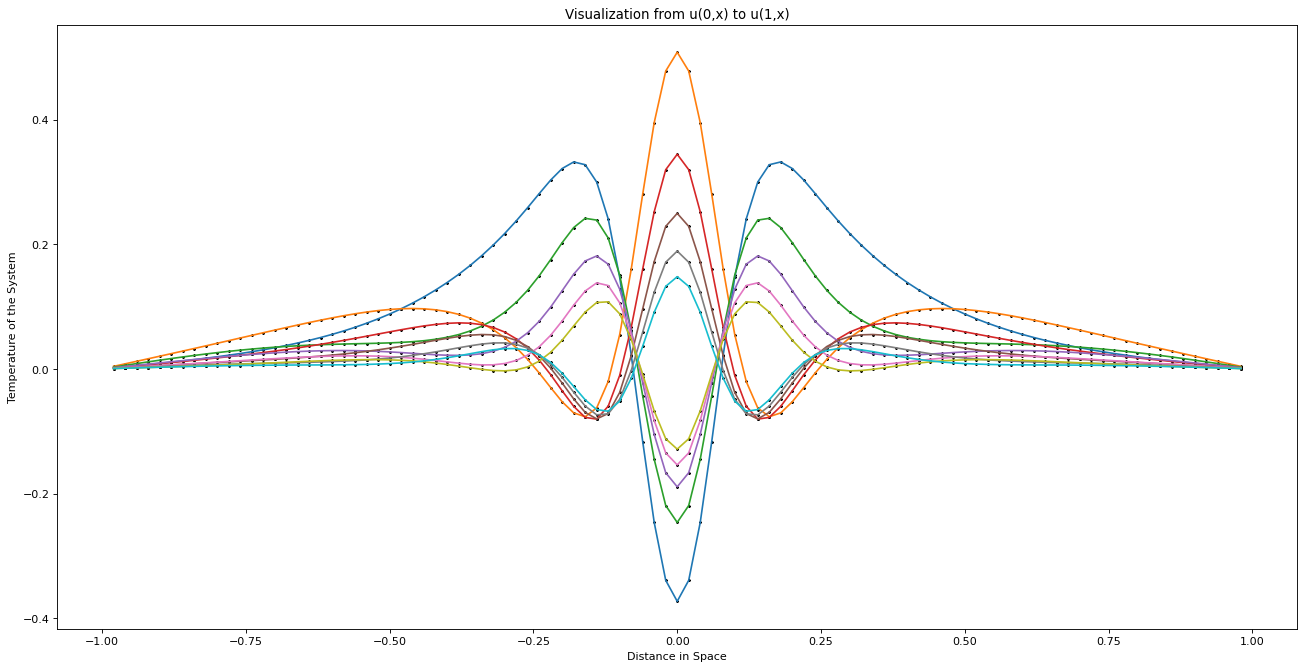

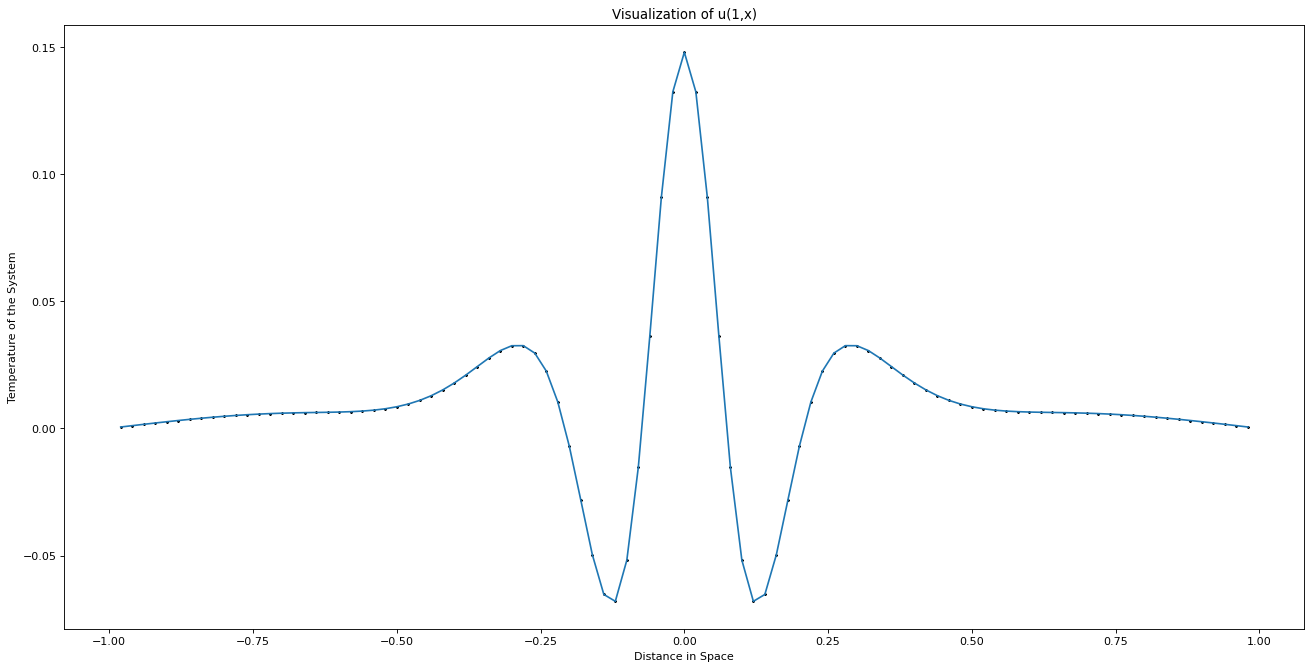

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.1
r = k/(2*h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A[i,i]= (1-2*r)
        A[i,i+1]= r
        A[i+1,i]= r
    return (A)
def CreateA2():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)

def test2():
    X = np.matmul(CreateA(),Createb())
    t = np.arange(-1+h,1,h)
    for i in range (0,10):
        uj1 = solve(CreateA2(),X)
        X = np.matmul(CreateA(),uj1)
        plt.plot(t,uj1)
        plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        plt.title("Visualization from u(0,x) to u(1,x)")
        plt.xlabel('Distance in Space')
        plt.ylabel('Temperature of the System')
    plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Now Take

k = 0.01
h = 0.02

Forward Euler in Time and Central Difference in Space

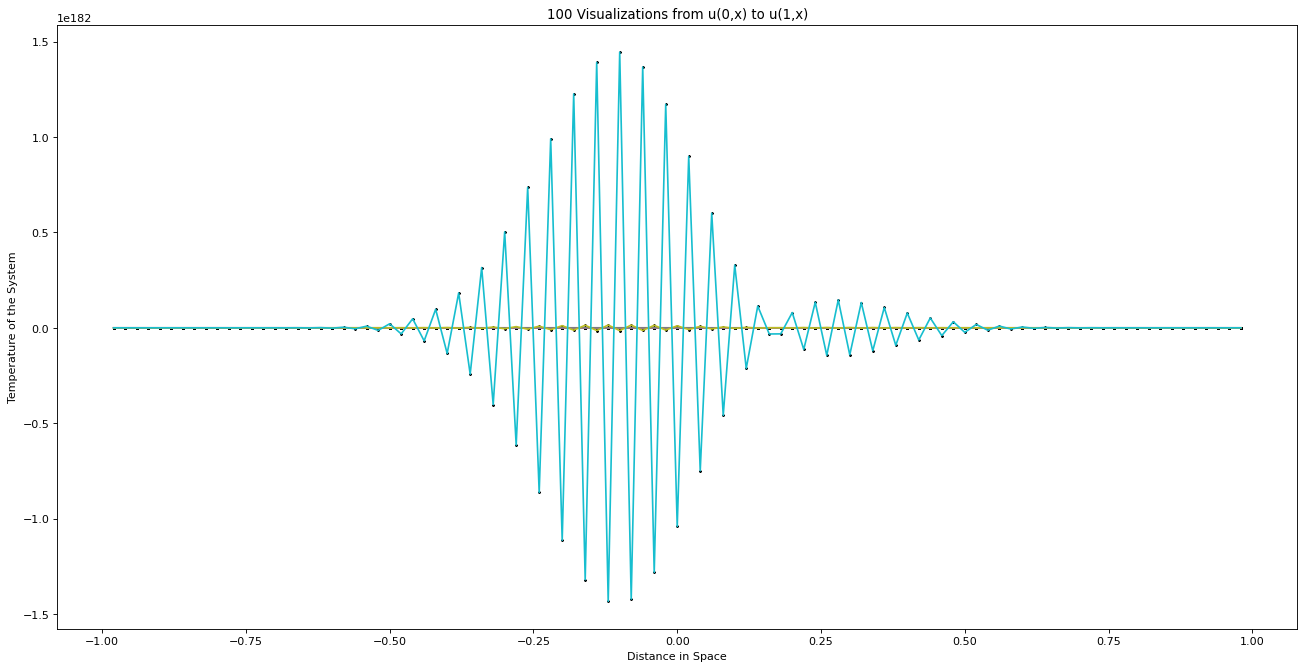

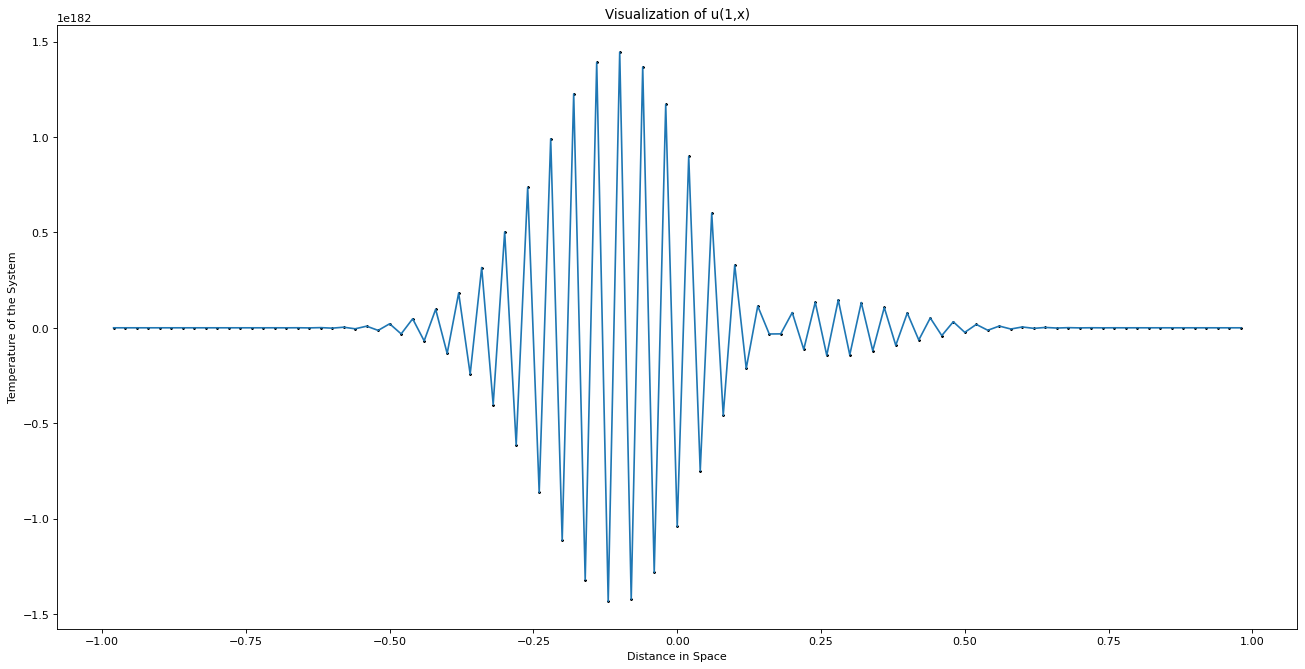

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.01
r = k/(h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA2():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A[i,i]= (1-2*r)
        A[i,i+1]= r
        A[i+1,i]= r
    return (A)

def test2():
    X = Createb()
    t = np.arange(-1+h,1,h)
    for i in range (0,100):
        uj1 = np.matmul(CreateA2(),X)
        X = uj1
        plt.plot(t,uj1)
        plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        plt.title("100 Visualizations from u(0,x) to u(1,x)")
        plt.xlabel('Distance in Space')
        plt.ylabel('Temperature of the System')
    plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Backward Euler in Time and Central Difference in Space

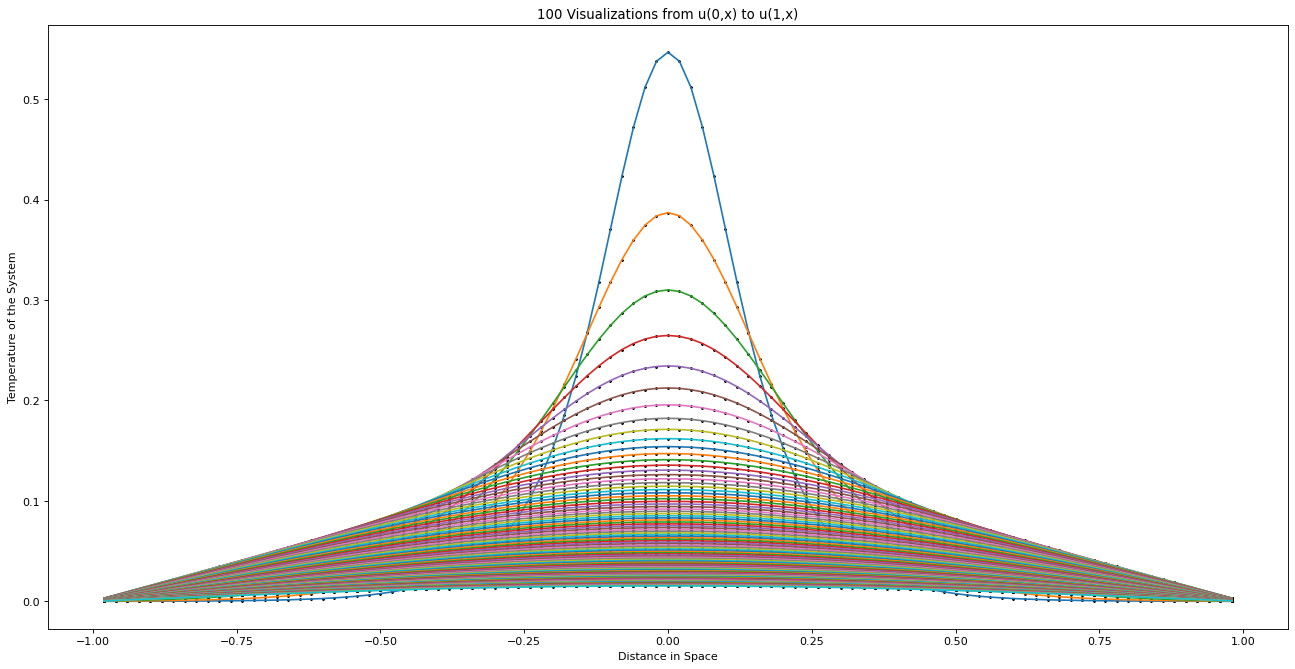

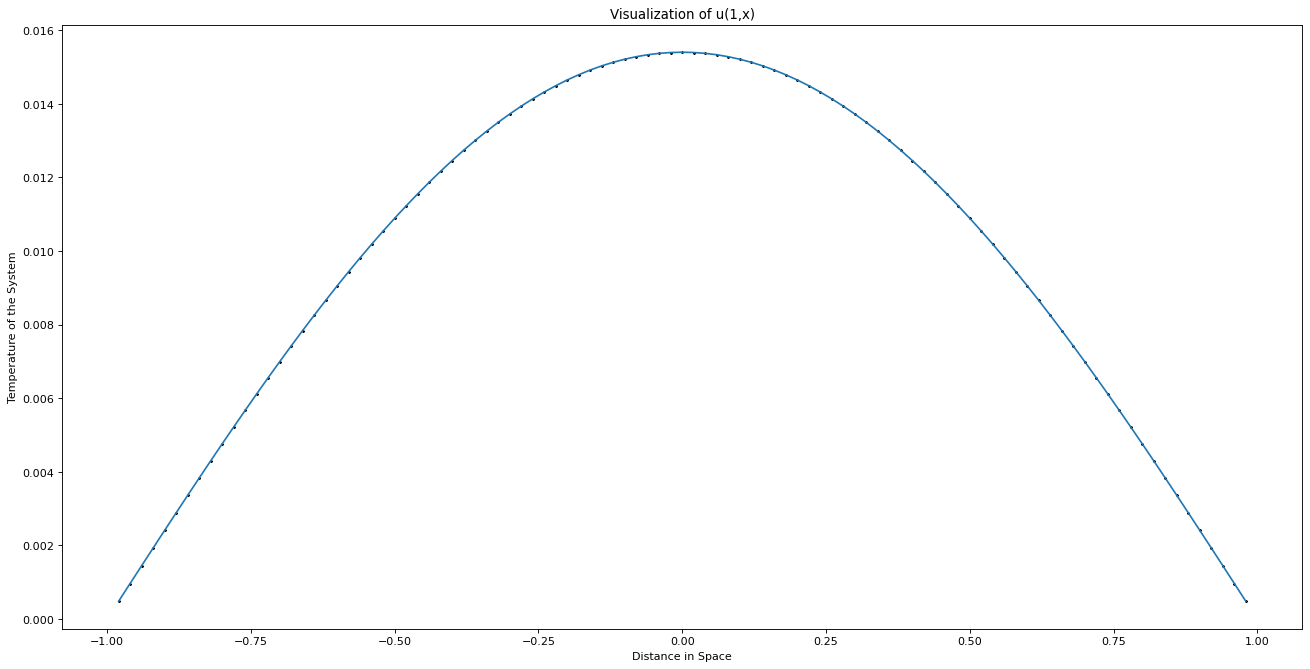

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.01
r = k/(h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)

def test2():
    X = Createb()
    t = np.arange(-1+h,1,h)
    for i in range (0,100):
        uj1 = solve(CreateA(),X)
        X = uj1
        plt.plot(t,uj1)
        plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        plt.title("100 Visualizations from u(0,x) to u(1,x)")
        plt.xlabel('Distance in Space')
        plt.ylabel('Temperature of the System')
    plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Crank Nicolson in Time and Central Difference in Space

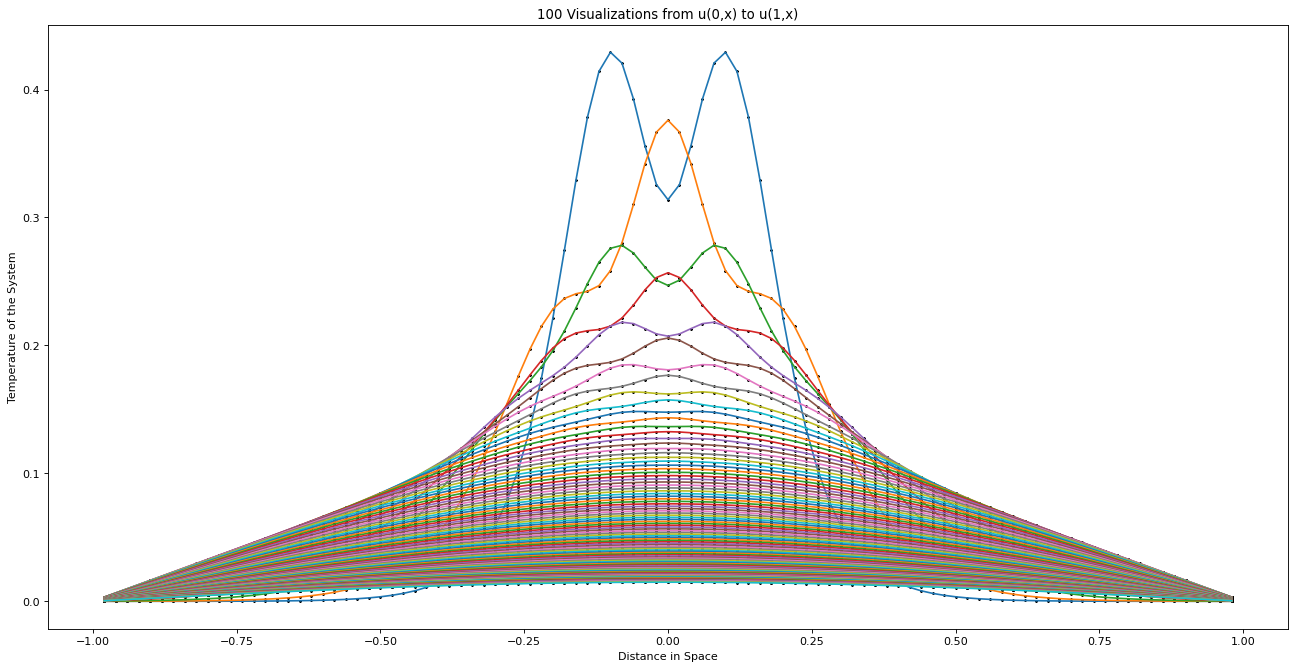

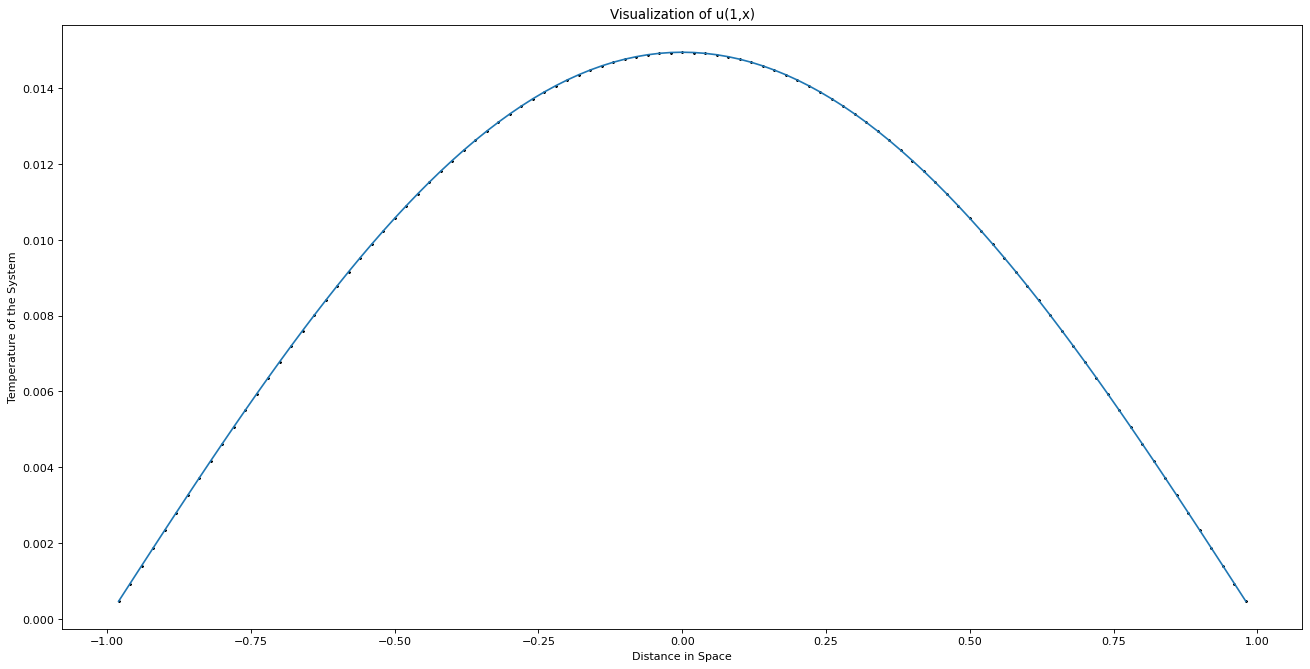

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.01
r = k/(2*h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A[i,i]= (1-2*r)
        A[i,i+1]= r
        A[i+1,i]= r
    return (A)
def CreateA2():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)

def test2():
    X = np.matmul(CreateA(),Createb())
    t = np.arange(-1+h,1,h)
    for i in range (0,100):
        uj1 = solve(CreateA2(),X)
        X = np.matmul(CreateA(),uj1)
        plt.plot(t,uj1)
        plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        plt.title("100 Visualizations from u(0,x) to u(1,x)")
        plt.xlabel('Distance in Space')
        plt.ylabel('Temperature of the System')
    plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Now Take

k = 0.001
h = 0.02

Forward Euler in Time and Central Difference in Space

/Users/RyanReiff/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in matmul
/Users/RyanReiff/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


<Figure size 1600x800 with 0 Axes>

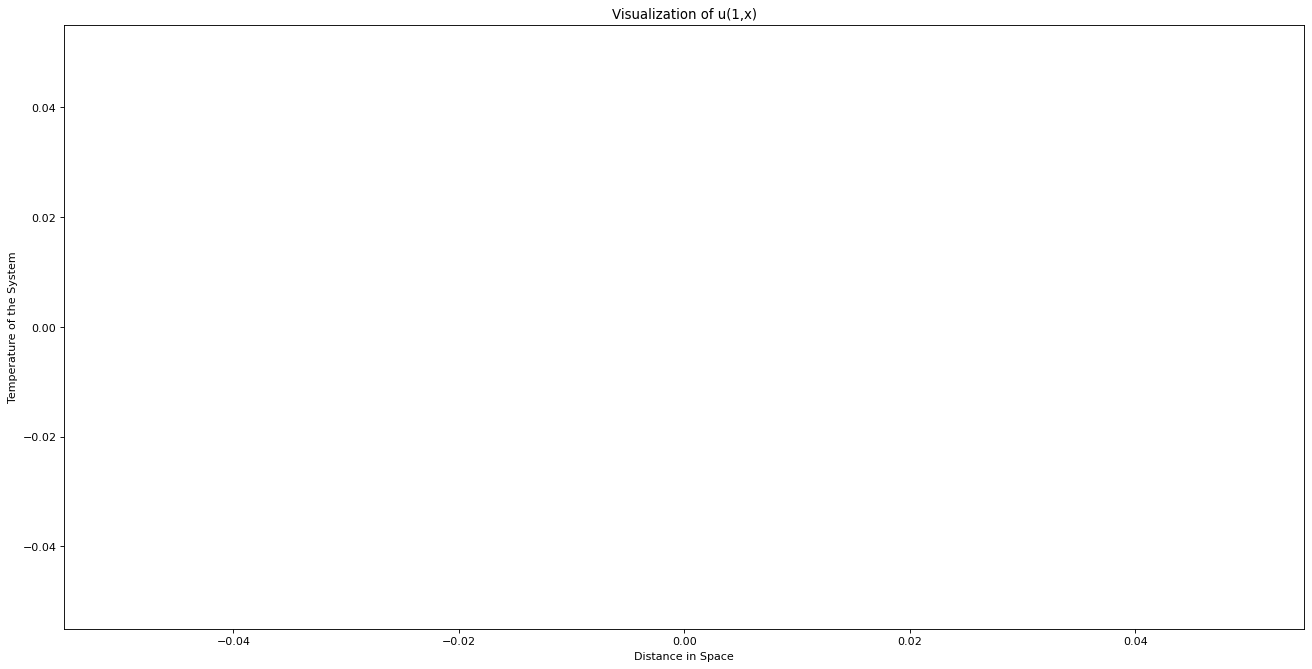

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.001
r = k/(h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA2():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A[i,i]= (1-2*r)
        A[i,i+1]= r
        A[i+1,i]= r
    return (A)

def test2():
    X = Createb()
    t = np.arange(-1+h,1,h)
    for i in range (0,1000):
        uj1 = np.matmul(CreateA2(),X)
        X = uj1
        #plt.plot(t,uj1)
        #plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        #plt.title("1000 Visualizations from u(0,x) to u(1,x)")
        #plt.xlabel('Distance in Space')
        #plt.ylabel('Temperature of the System')
    #plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

The error is so large above that I was unable to capture it in a graph. This makes sense, because Forward Euler isn't 

unconditionally stable, thus as we shrink our step size k, we just create more iterations for this method to accumulate

errors in.

Backward Euler in Time and Central Difference in Space

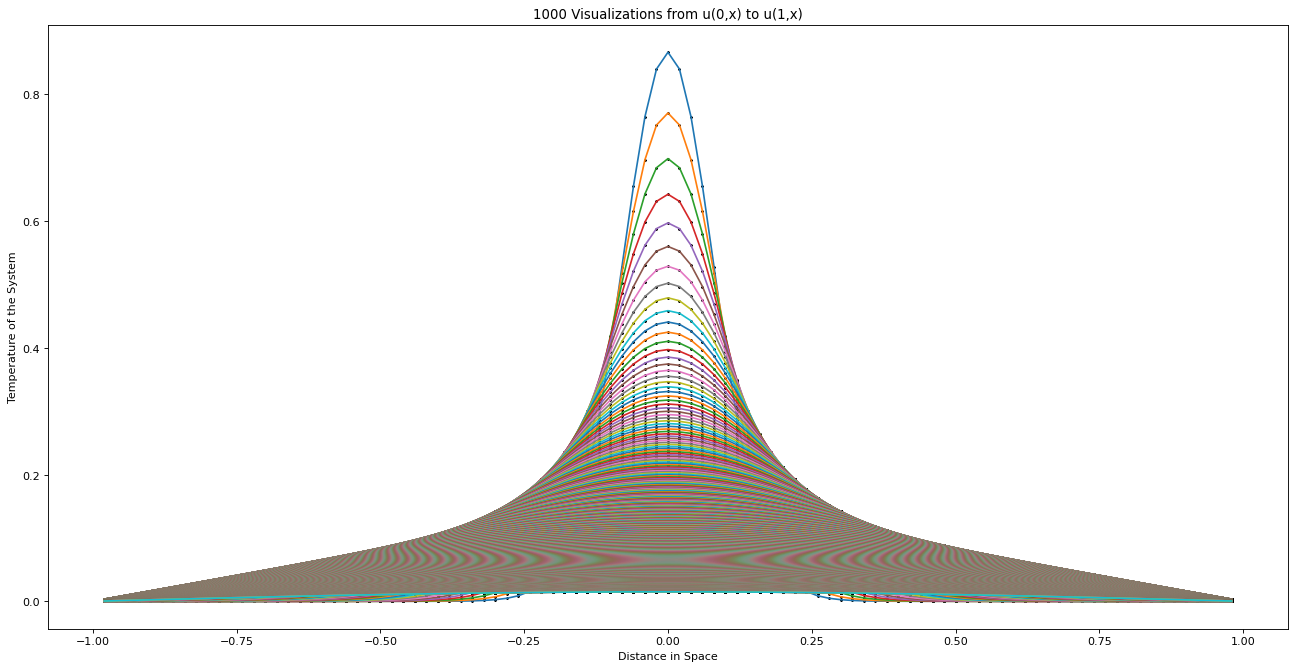

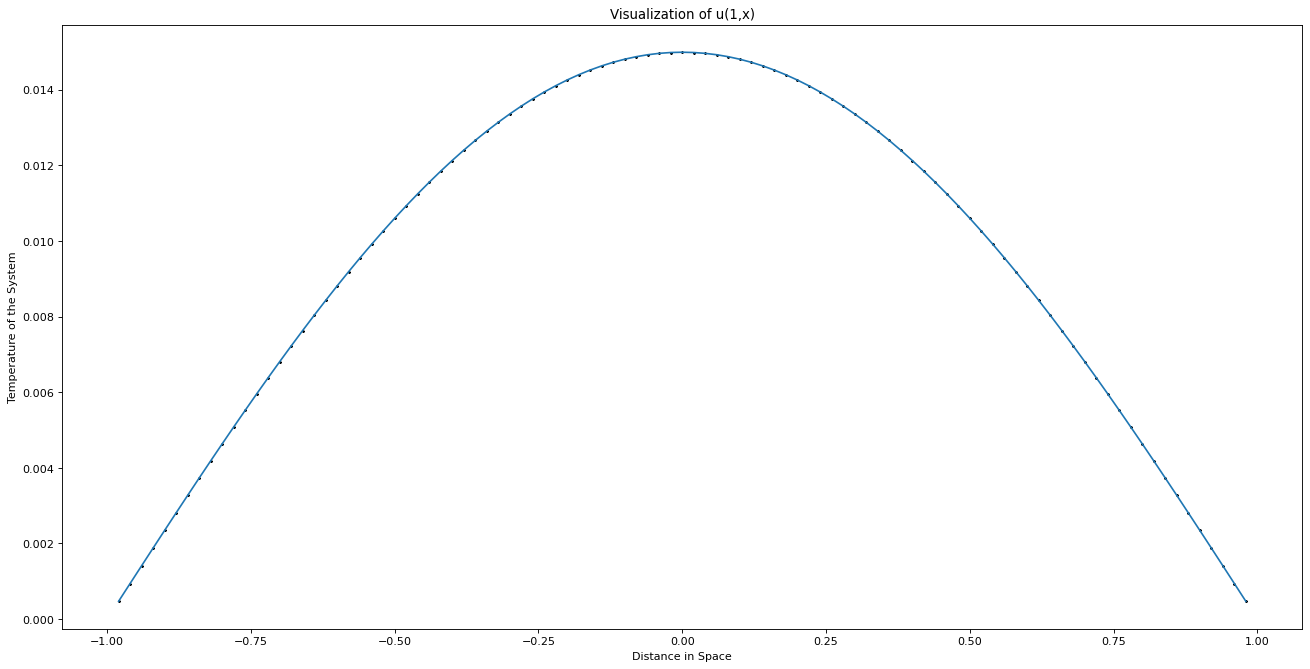

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.001
r = k/(h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)

def test2():
    X = Createb()
    t = np.arange(-1+h,1,h)
    for i in range (0,1000):
        uj1 = solve(CreateA(),X)
        X = uj1
        plt.plot(t,uj1)
        plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        plt.title("1000 Visualizations from u(0,x) to u(1,x)")
        plt.xlabel('Distance in Space')
        plt.ylabel('Temperature of the System')
    plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Crank Nicolson in Time and Central Difference in Space

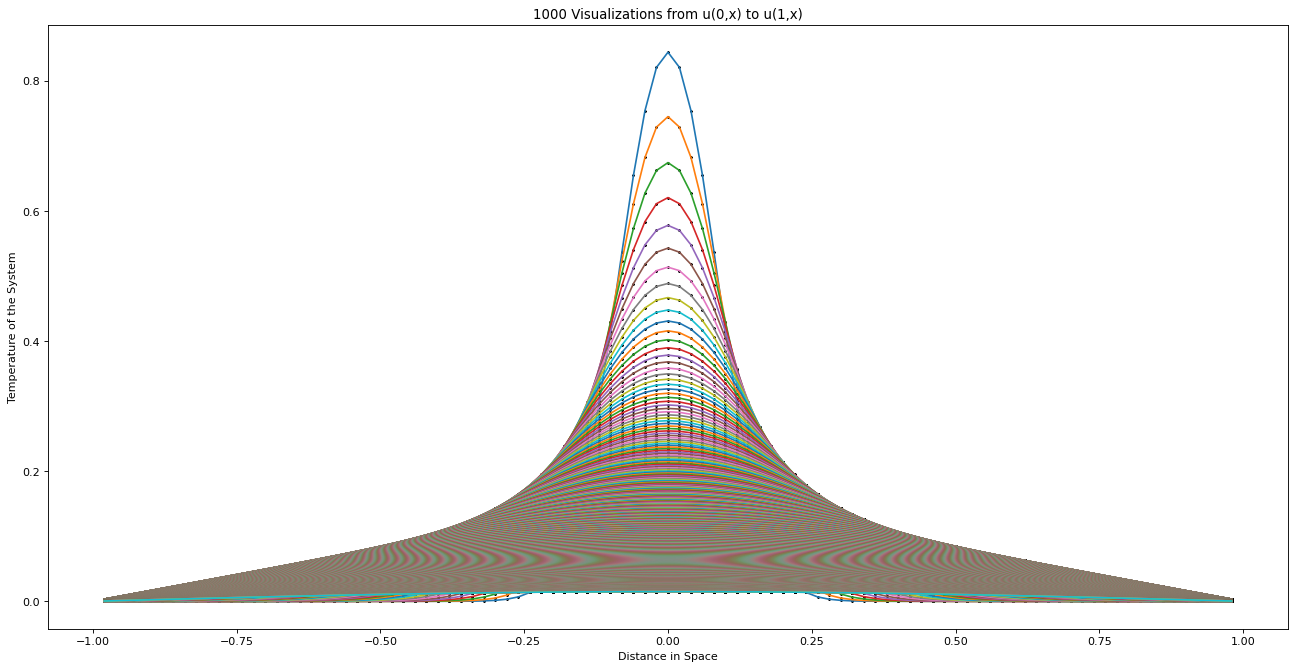

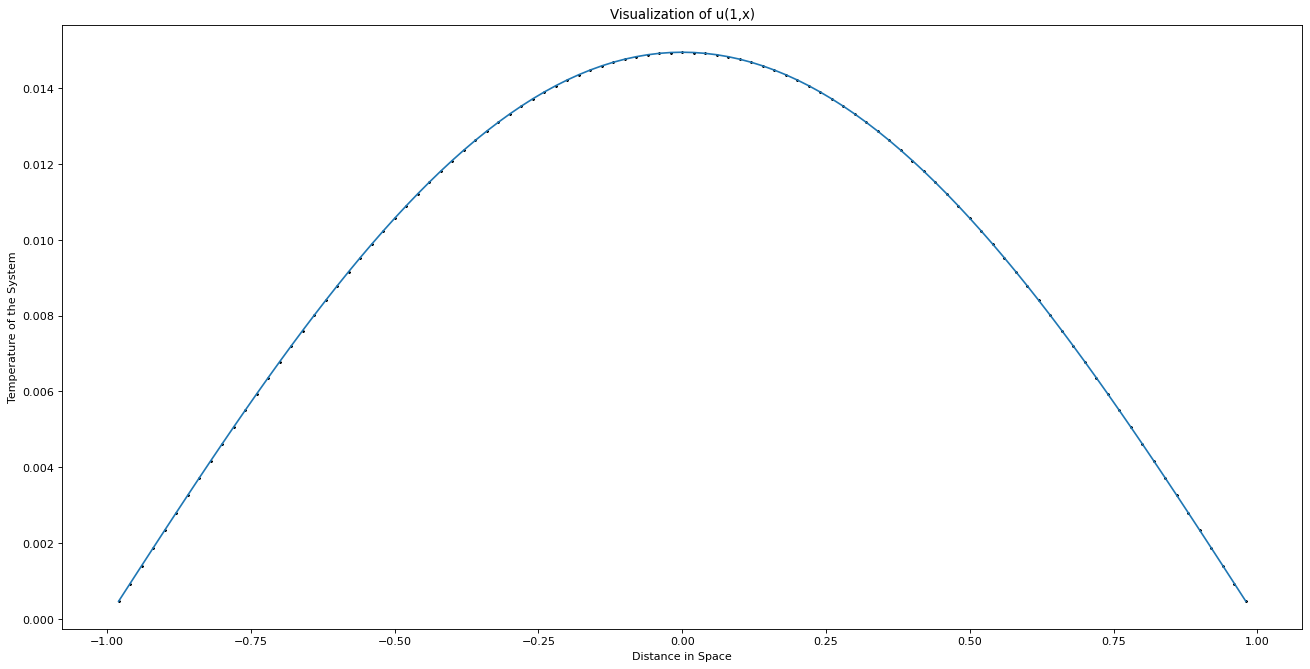

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.001
r = k/(2*h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A[i,i]= (1-2*r)
        A[i,i+1]= r
        A[i+1,i]= r
    return (A)
def CreateA2():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)

def test2():
    X = np.matmul(CreateA(),Createb())
    t = np.arange(-1+h,1,h)
    for i in range (0,1000):
        uj1 = solve(CreateA2(),X)
        X = np.matmul(CreateA(),uj1)
        plt.plot(t,uj1)
        plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        plt.title("1000 Visualizations from u(0,x) to u(1,x)")
        plt.xlabel('Distance in Space')
        plt.ylabel('Temperature of the System')
    plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Finally Take,

k = 0.0001
h = 0.02

Forward Euler in Time and Central Difference in Space

<Figure size 1600x800 with 0 Axes>

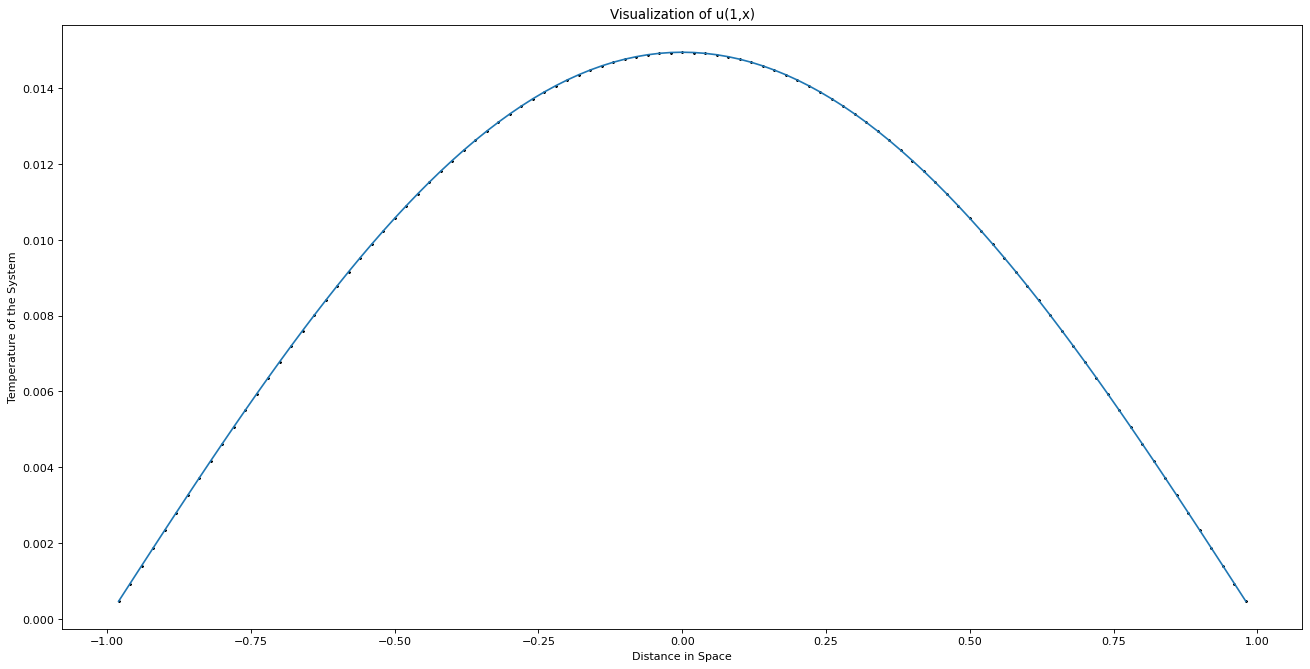

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.0001
r = k/(h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA2():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A[i,i]= (1-2*r)
        A[i,i+1]= r
        A[i+1,i]= r
    return (A)

def test2():
    X = Createb()
    t = np.arange(-1+h,1,h)
    for i in range (0,10000):
        uj1 = np.matmul(CreateA2(),X)
        X = uj1
        #plt.plot(t,uj1)
        #plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        #plt.title("10000 Visualizations from u(0,x) to u(1,x)")
        #plt.xlabel('Distance in Space')
        #plt.ylabel('Temperature of the System')
    #plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Backward Euler in Time and Central Difference in Space

<Figure size 1600x800 with 0 Axes>

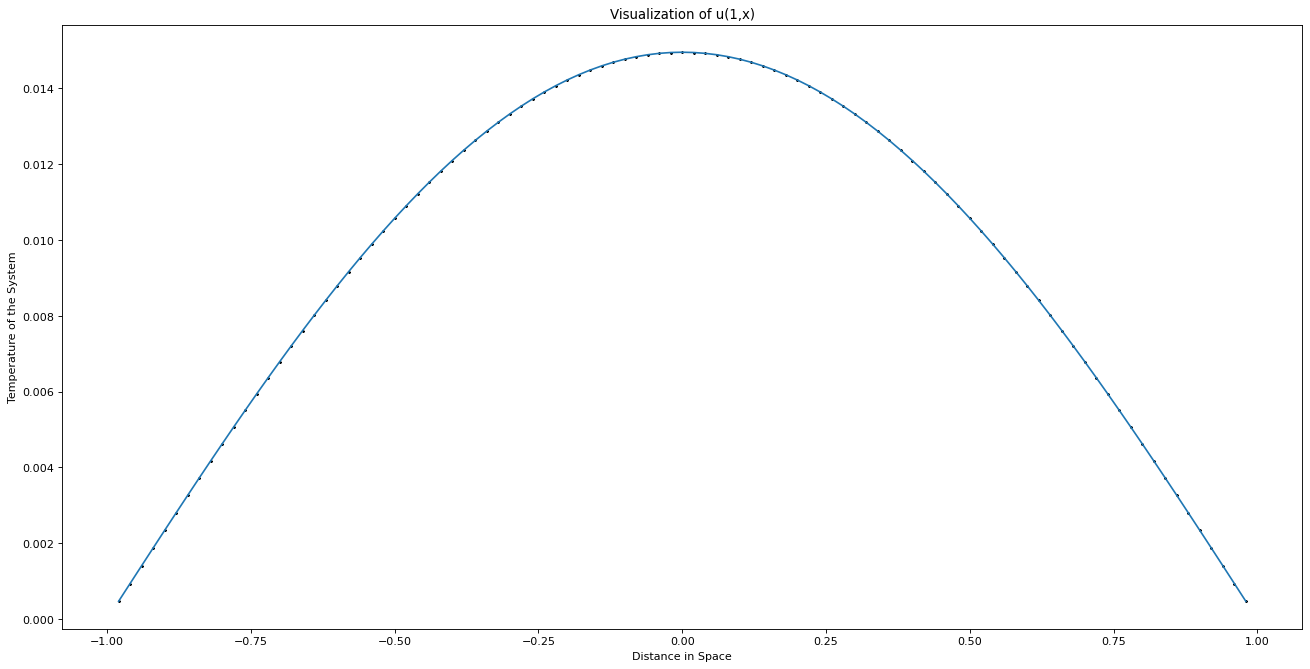

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.0001
r = k/(h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)

def test2():
    X = Createb()
    t = np.arange(-1+h,1,h)
    for i in range (0,10000):
        uj1 = solve(CreateA(),X)
        X = uj1
        #plt.plot(t,uj1)
        #plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
        #plt.title("1000 Visualizations from u(0,x) to u(1,x)")
        #plt.xlabel('Distance in Space')
        #plt.ylabel('Temperature of the System')
    #plt.show()
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Crank Nicolson in Time and Central Difference in Space

<Figure size 1600x800 with 0 Axes>

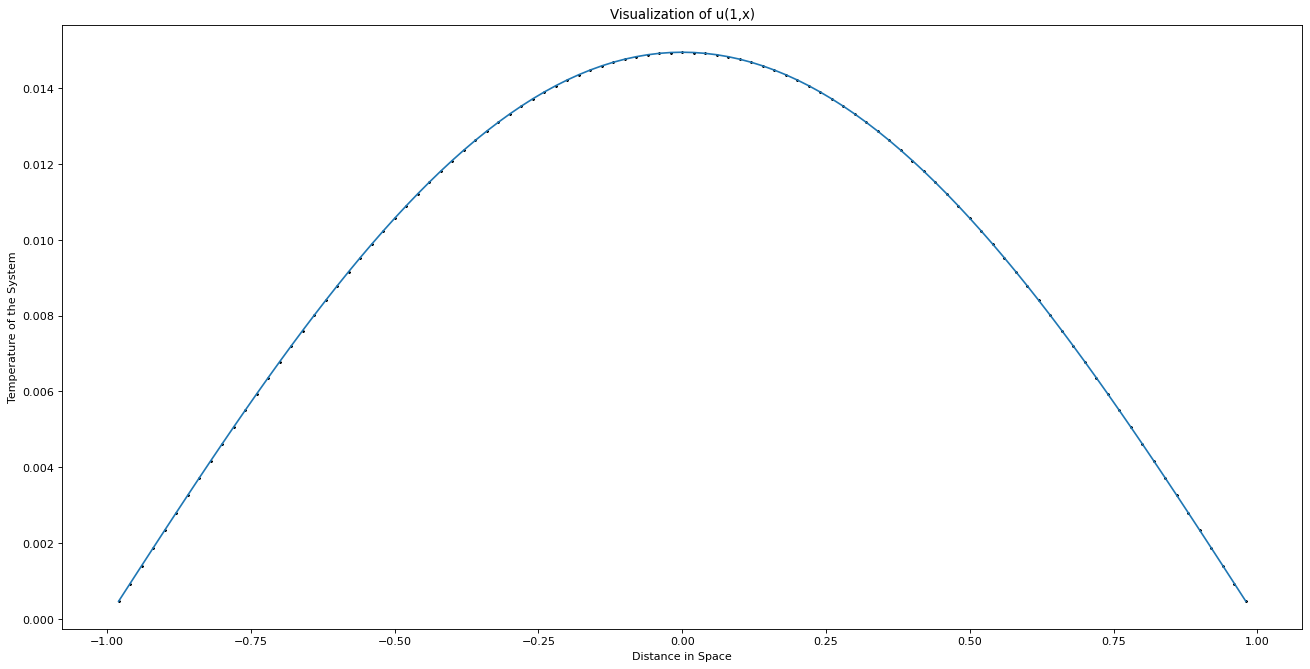

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

h = 0.02
n = 100
k = 0.0001
r = k/(2*h**2)
X = np.zeros((n-1,1))

def Createb():
    b = np.zeros((n-1,1))
    x = np.arange(-1+h,1,h)
    for i in range (0,n-1):
        b[i,0]= math.e**(-100*x[i]**2)   
    return (b)

def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A[i,i]= (1-2*r)
        A[i,i+1]= r
        A[i+1,i]= r
    return (A)
def CreateA2():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)

def test2():
    X = np.matmul(CreateA(),Createb())
    t = np.arange(-1+h,1,h)
    for i in range (0,10000):
        uj1 = solve(CreateA2(),X)
        X = np.matmul(CreateA(),uj1)
    return (uj1)

uj1 = test2()
t = np.arange(-1+h,1,h)
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t,uj1)
plt.scatter(t,uj1, label= "stars", color= "black", marker= "*", s=3)
plt.title("Visualization of u(1,x)")
plt.xlabel('Distance in Space')
plt.ylabel('Temperature of the System')
plt.show()

Analysis of Reuslts:

The most important thing to remember when looking at the above graphs, is when each is stable. The backwards Euler 
Method as well as Crank Nicolson Method are unconditionally stable, which is why we are able to observe them converging to approximate some solution regardless of the step size of k. The forwards Euler Method on the other hand, is only stable when (k/h^2) < 0.5. This only occurs in part D when k = 0.0001, making 0.25 < 0.5, which is why this is the only time that we are able to observe an accurate approximation with this method. Observing the y-axes units for the Forward Euler Method, we are on the order of e20 and even e180 at some points, and sometimes the method is so out of control that it can not even be graphed on the plane, the values are so large.
